In [5]:
colors = {'red':(253/256,108/256,108/256),
          'blue':(0,118/256,204/256), 
          'yellow':(253/256,199/256,55/256), 
          'green':(96/256,204/256,141/256)}

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import numpy as np
import pandas as pd
import os

In [10]:
os.getcwd()
user_data = pd.read_excel('./data/Usuarios Wiggot.xlsx')
user_data.rename({'Tasa de accecibilidad': 'Tasa de accesibilidad', 'Portales Utiliados':'Portales Utilizados'}, axis=1, inplace=True)
user_data.drop(['fullname', '[%Key_User]'], axis=1, inplace=True)
user_data_num = user_data.drop(['State User', 'Agencia', 'Asociación', 'Antigüedad'], axis=1)
user_data_num = user_data_num.loc[user_data['Búsquedas']>0]

In [11]:
user_data.describe(include = 'object')

State User      Agencia      Asociación Antigüedad   Plan
count        23672        23670           23672      23672  23672
unique          35         6012              65          6      6
top     SIN ESTADO  SIN AGENCIA  SIN ASOCIACIÓN          1   FREE
freq         10506        13057           17307       9612  22494

In [12]:
user_data[user_data['Búsquedas']>0].describe()

Usuario Agencia  Usuario Asociación    Búsquedas  \
count      1170.000000         1170.000000  1170.000000   
mean          0.748718            0.470085    10.524786   
std           0.433936            0.499318    17.567803   
min           0.000000            0.000000     1.000000   
25%           0.000000            0.000000     2.000000   
50%           1.000000            0.000000     5.000000   
75%           1.000000            1.000000    11.000000   
max           1.000000            1.000000   211.000000   

       Tasa de accesibilidad  Propiedades Totales  Propiedades Publicadas  \
count            1170.000000          1170.000000             1170.000000   
mean                0.911184            46.949573               16.647009   
std                 1.738956           173.475434               68.353514   
min                 0.000000             0.000000                0.000000   
25%                 0.000000             0.000000                0.000000   
50%                 0.500000             7.000000                2.000000   
75%                 1.083333            35.000000               12.000000   
max                34.000000          3126.000000             1397.000000   

       Desarrollos Totales  Desarrollos Publicados  Fichas Compartidas  \
count          1170.000000             1170.000000         1170.000000   
mean              0.431624                0.070085           79.479487   
std               4.494939                0.679816          254.475105   
min               0.000000                0.000000            0.000000   
25%               0.000000                0.000000            0.000000   
50%               0.000000                0.000000            3.000000   
75%               0.000000                0.000000           33.000000   
max             145.000000               17.000000         3149.000000   

       Requerimientos Totales  Requerimientos Venta  Requerimientos Renta  \
count             1170.000000           1170.000000           1170.000000   
mean                 8.347009              5.554701              2.588034   
std                 26.837488             16.455477             11.909821   
min                  0.000000              0.000000              0.000000   
25%                  3.000000              2.000000              0.000000   
50%                  3.000000              3.000000              0.000000   
75%                  5.000000              4.000000              2.000000   
max                526.000000            341.000000            298.000000   

       Contactos Totales  Contactos Activos  Portales Utilizados  
count        1170.000000        1170.000000          1170.000000  
mean           15.382906          14.685470             1.553846  
std            60.328999          59.783644             3.696009  
min             0.000000           0.000000             0.000000  
25%             0.000000           0.000000             0.000000  
50%             2.000000           2.000000             0.000000  
75%             7.000000           6.000000             0.000000  
max          1158.000000        1158.000000            18.000000

In [73]:
user_data_num.Plan.unique()

array(['PRIME', 'FREE', 'FULL', 'PASS', 'PRO', '-'], dtype=object)

In [13]:
user_data_num['Paying'] = user_data_num.Plan.map({'PRIME':'Paying', 'FREE':'FREE', 'FULL':'Paying', 'PASS':'Paying', 'PRO':'Paying'})

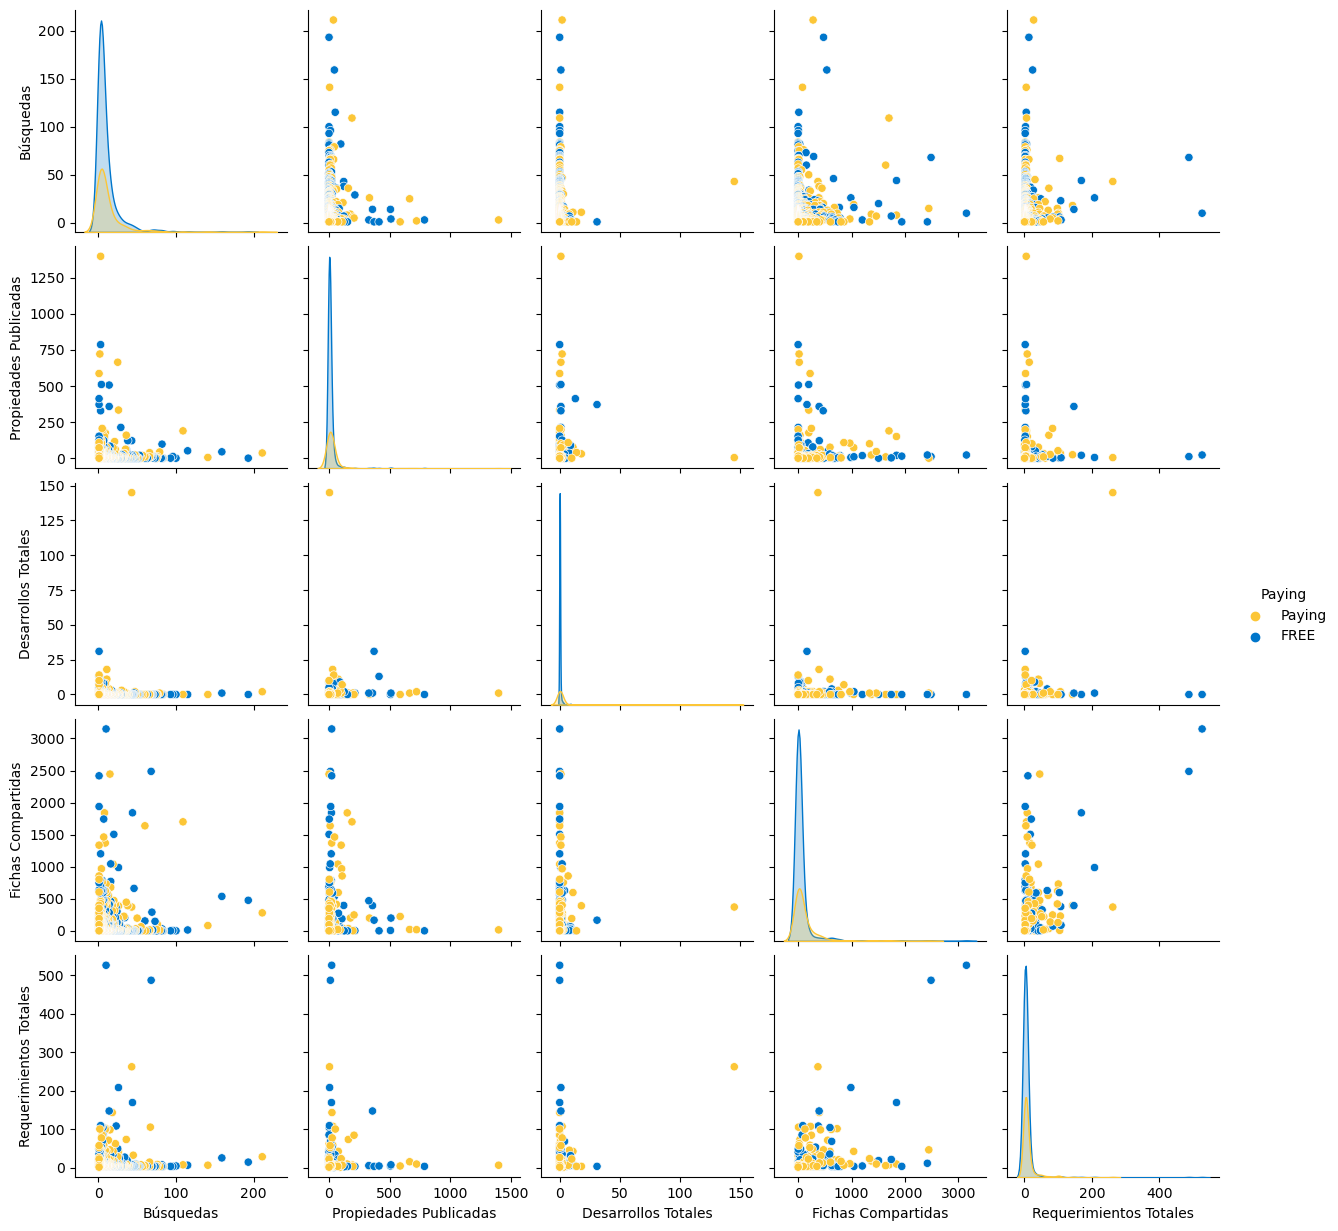

In [27]:
variables = ['Búsquedas', 
             'Propiedades Publicadas', 
             'Desarrollos Totales', 
             'Fichas Compartidas', 
             'Requerimientos Totales']
sns.pairplot(user_data_num, hue='Paying', vars=variables, palette={'Paying':colors['yellow'], 'FREE':colors['blue']})
plt.savefig('figures/pairplot_Ls.png', dpi=300, transparent=True)
plt.show()

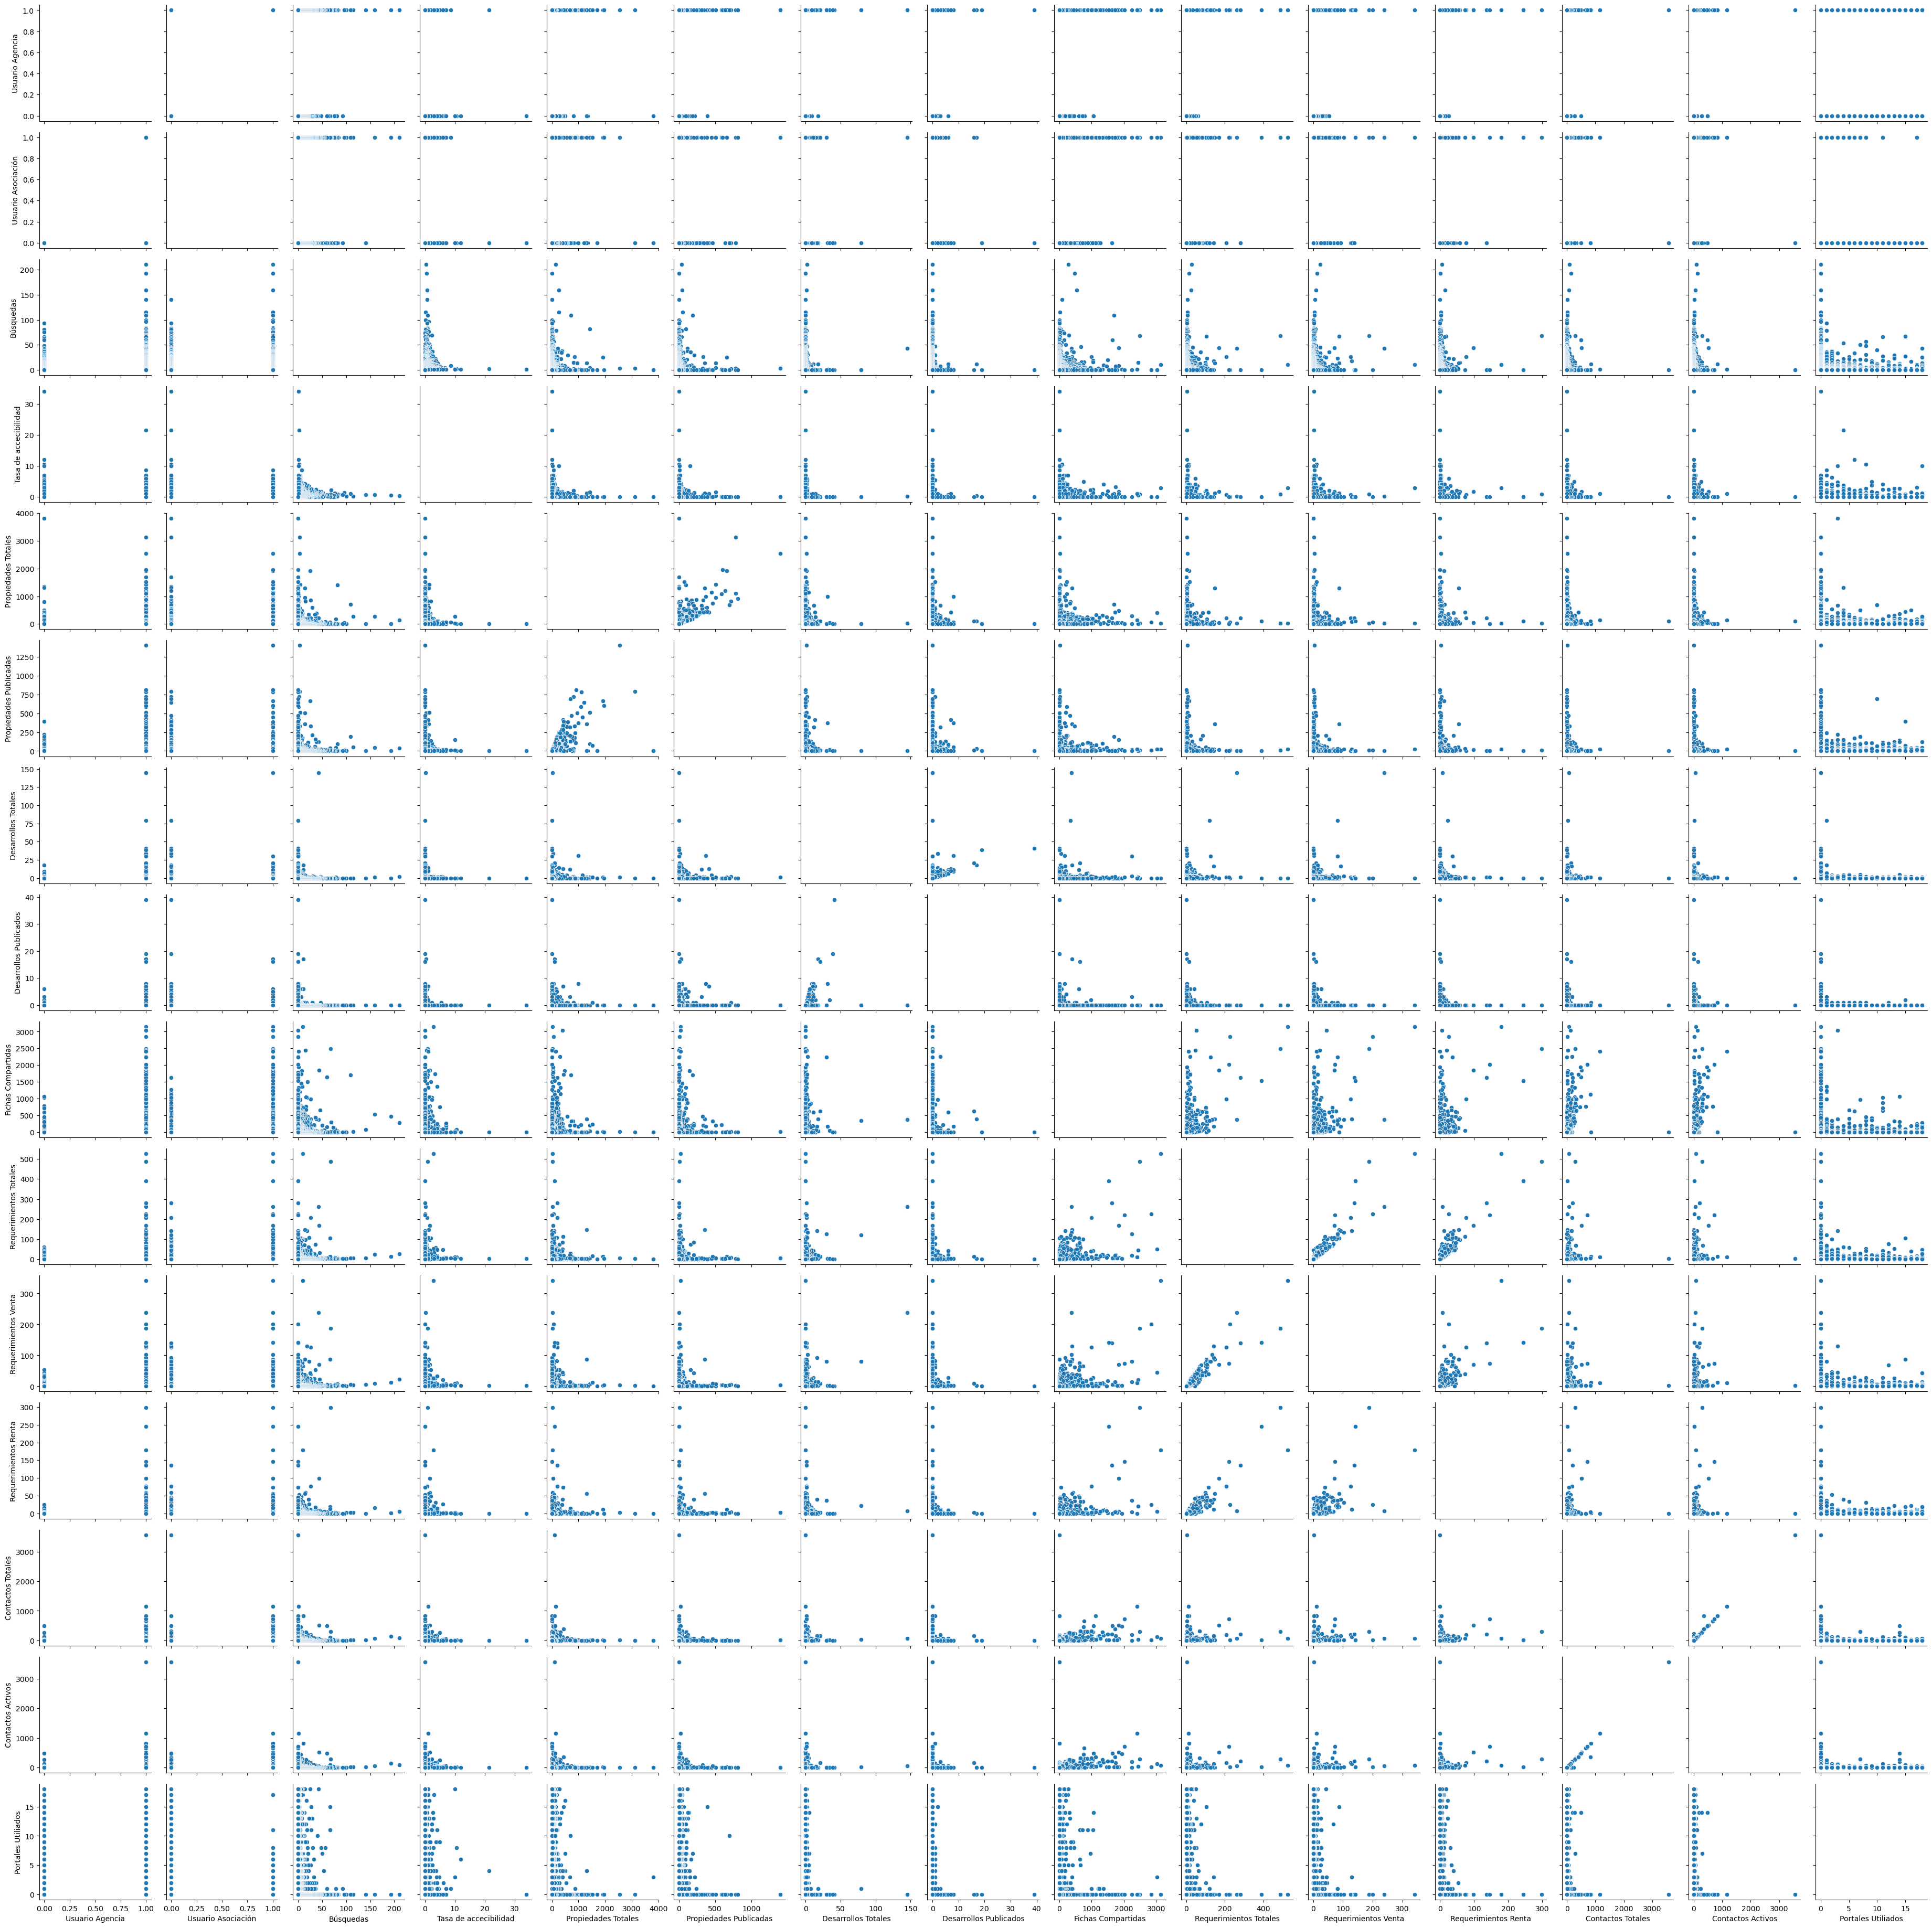

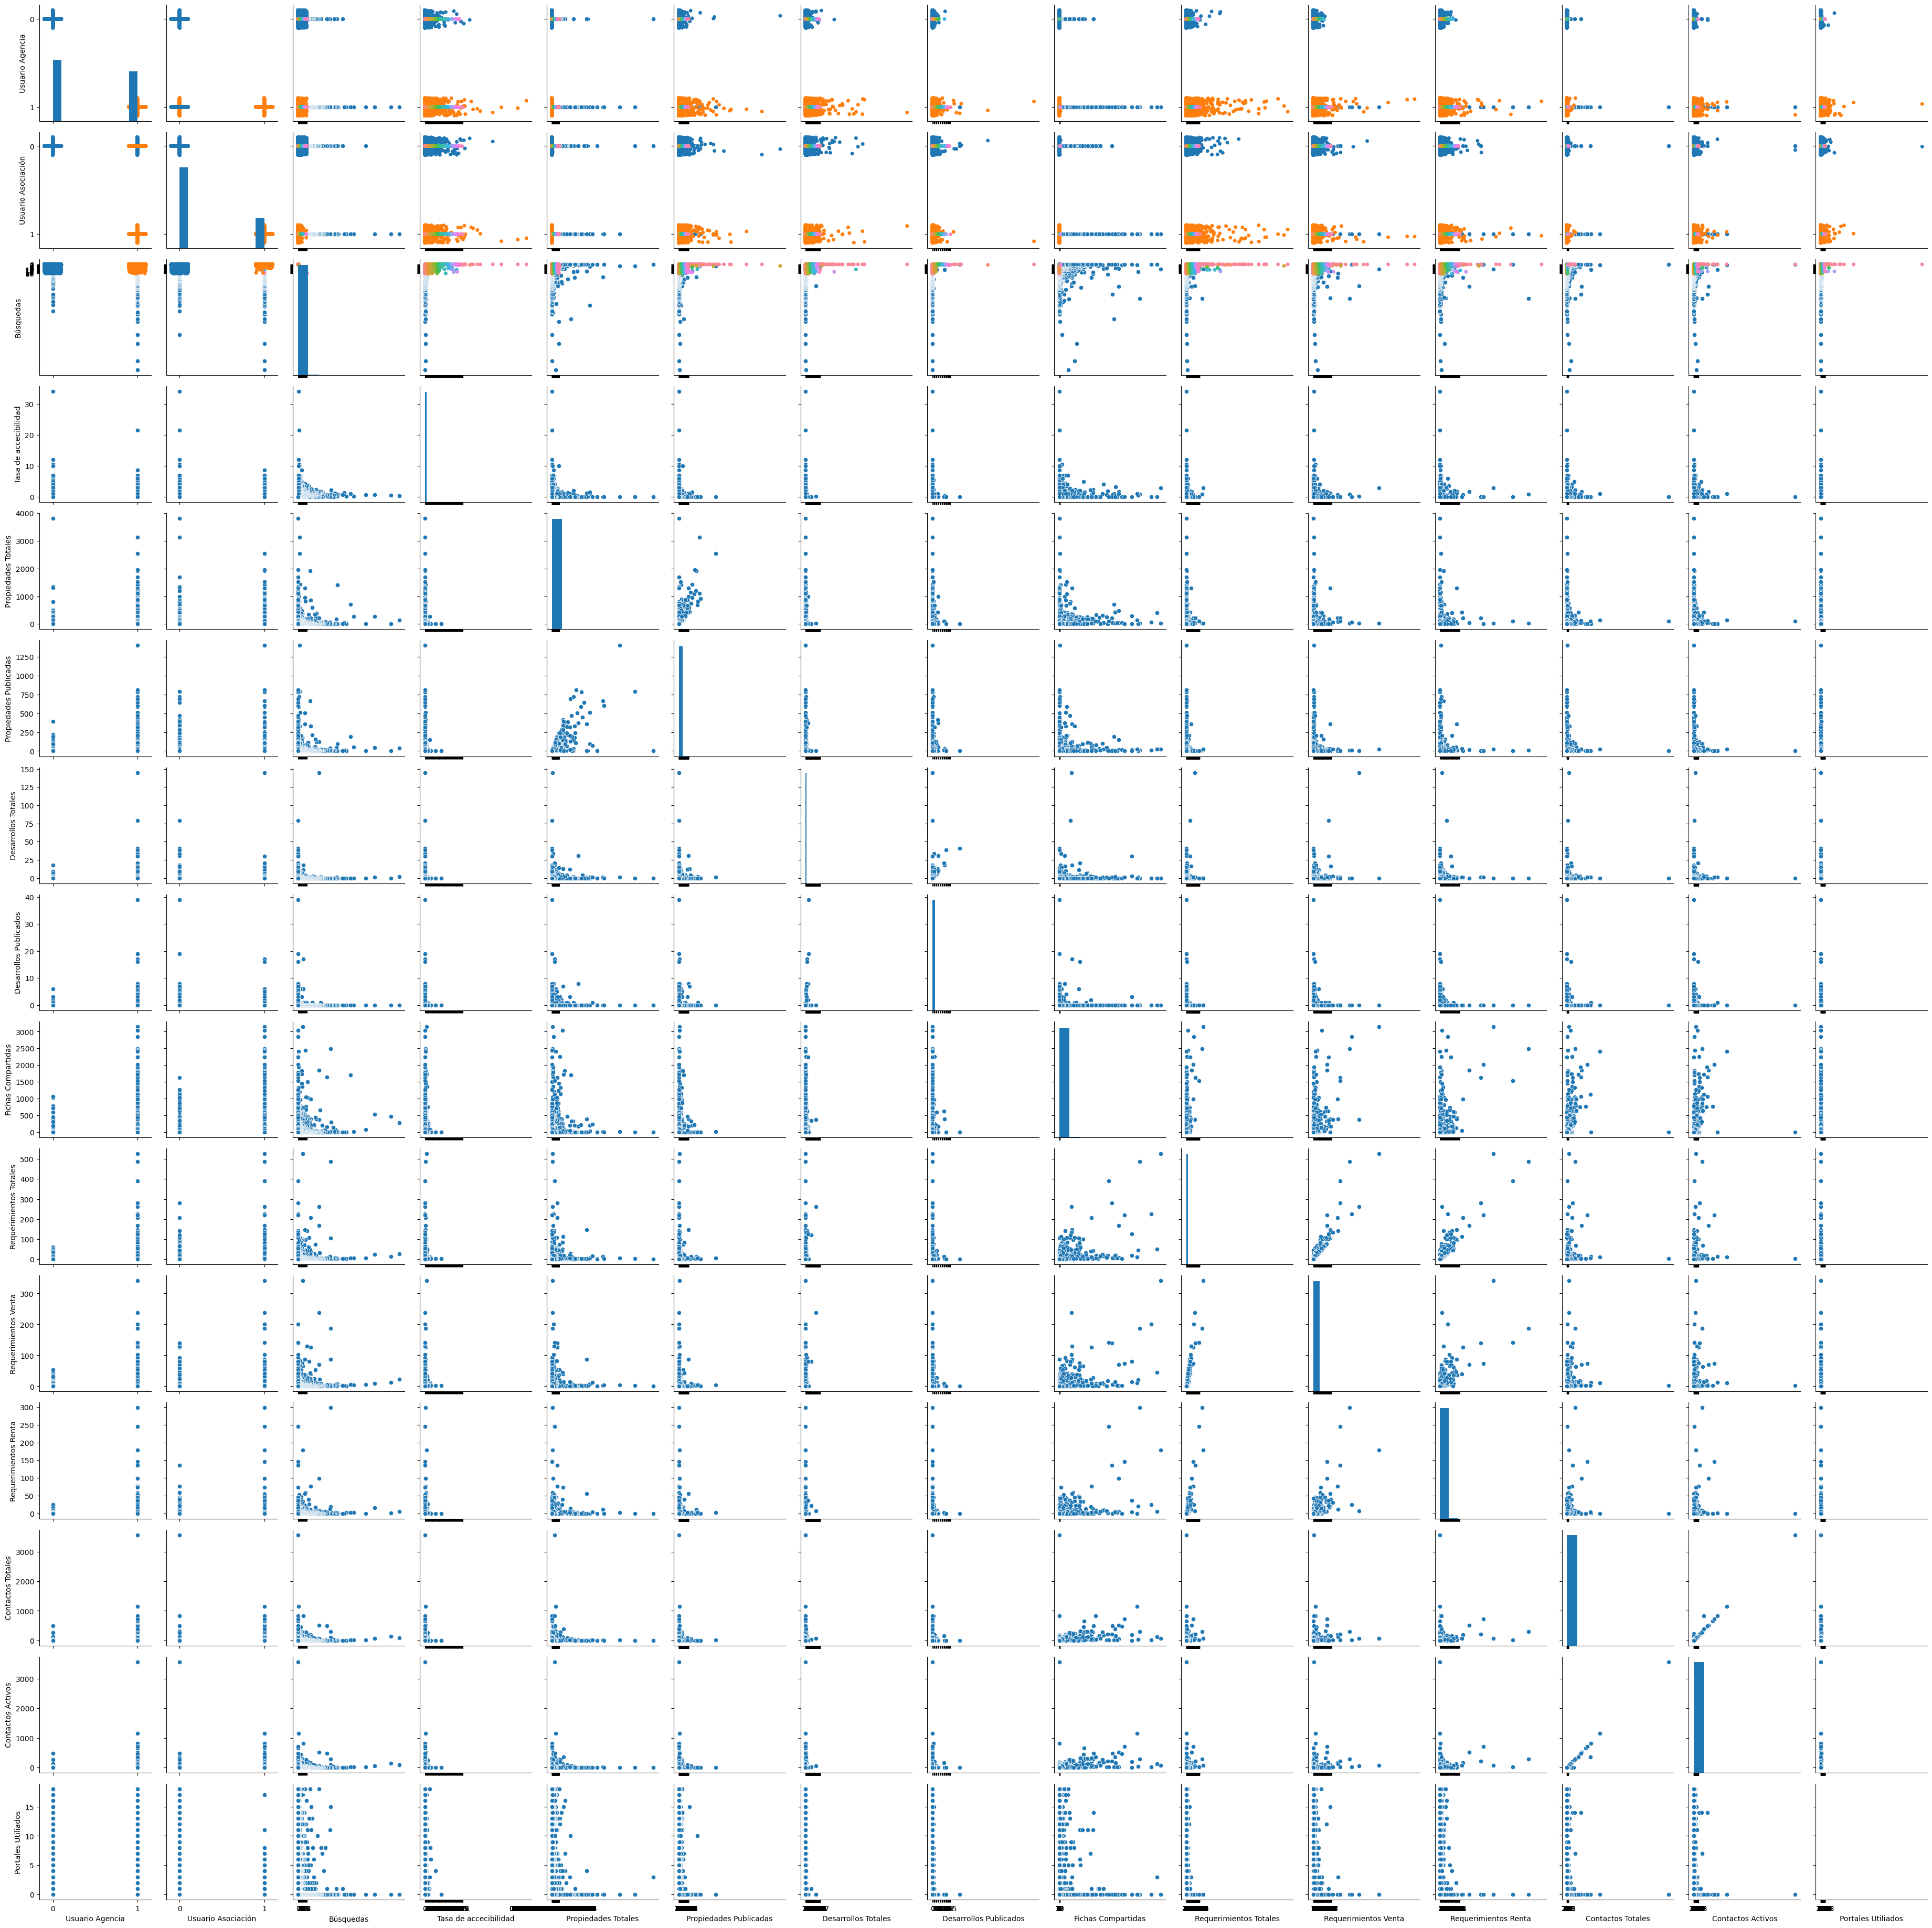

In [66]:
variables = ['Usuario Agencia', 'Usuario Asociación', 'Portales Utiliados', 
             'Búsquedas', 'Tasa de accecibilidad', 'Propiedades Totales',
             'Propiedades Publicadas', 'Desarrollos Totales', 'Desarrollos Publicados', 
             'Fichas Compartidas', 'Requerimientos Totales', 'Requerimientos Venta',
             'Requerimientos Renta', 'Contactos Totales', 'Contactos Activos']

g = sns.PairGrid(user_data_num)

g.map_offdiag(sns.scatterplot)

for i in range(3):
    for j in range(g.axes.shape[0]):
        g.axes[i,j] = sns.stripplot(x=user_data_num[variables[j]], y=user_data_num[variables[i]], orient='h', ax=g.axes[i,j])
        
for i in range(g.axes.shape[0]):
    for j in range(3):
        g.axes[j,i] = sns.stripplot(x=user_data_num[variables[i]], y=user_data_num[variables[j]], orient='v', ax=g.axes[j,i])

g.map_diag(plt.hist)

plt.show()

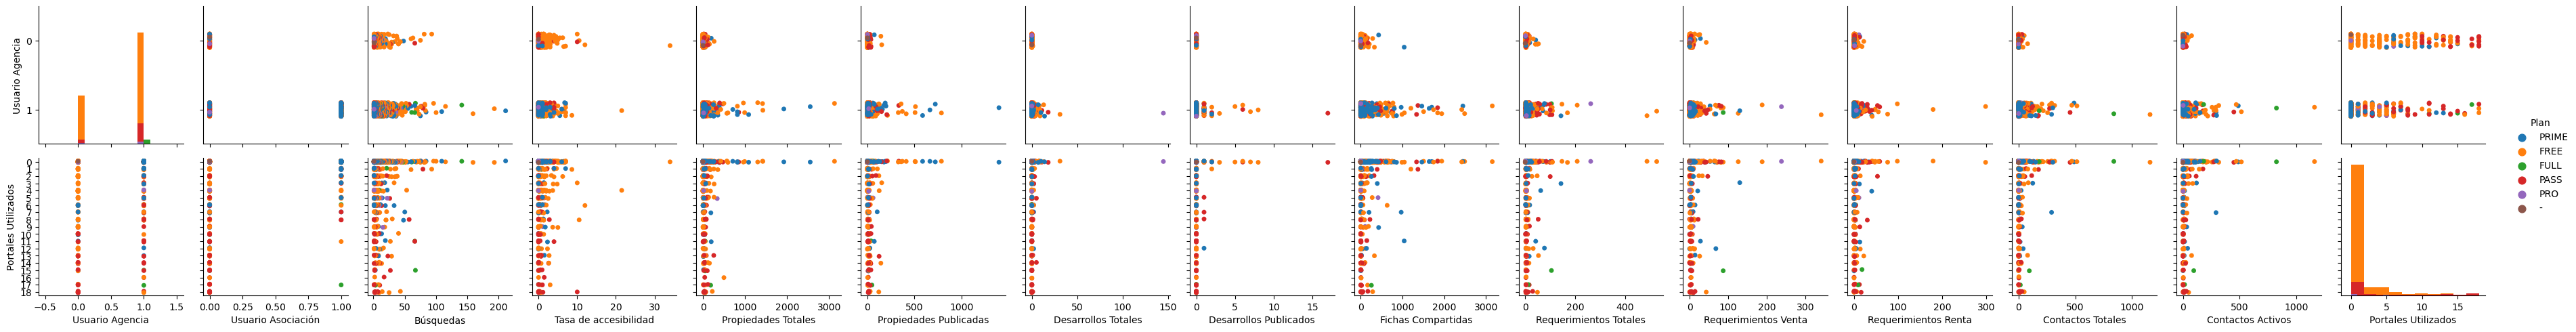

In [15]:
y_vars = ['Usuario Agencia', 'Portales Utilizados']
x_vars = []
g = sns.PairGrid(user_data_num, hue='Plan', y_vars=y_vars)
g.map_offdiag(sns.stripplot, orient='h')
g.map_diag(plt.hist)
#g.map(sns.stripplot)
#g.savefig("pairplot.png")
g.add_legend()
plt.show()

In [20]:
user_data_num.groupby('Portales Utilizados').Plan.value_counts()

Portales Utilizados  Plan 
0                    FREE     652
                     PRIME    151
                     PASS      68
                     FULL      15
                     PRO        7
                             ... 
17                   PASS       3
                     FREE       2
                     FULL       1
18                   PASS       7
                     FREE       5
Name: Plan, Length: 65, dtype: int64

In [56]:
sns.pairplot(user_data_num, hue='Usuario Agencia')

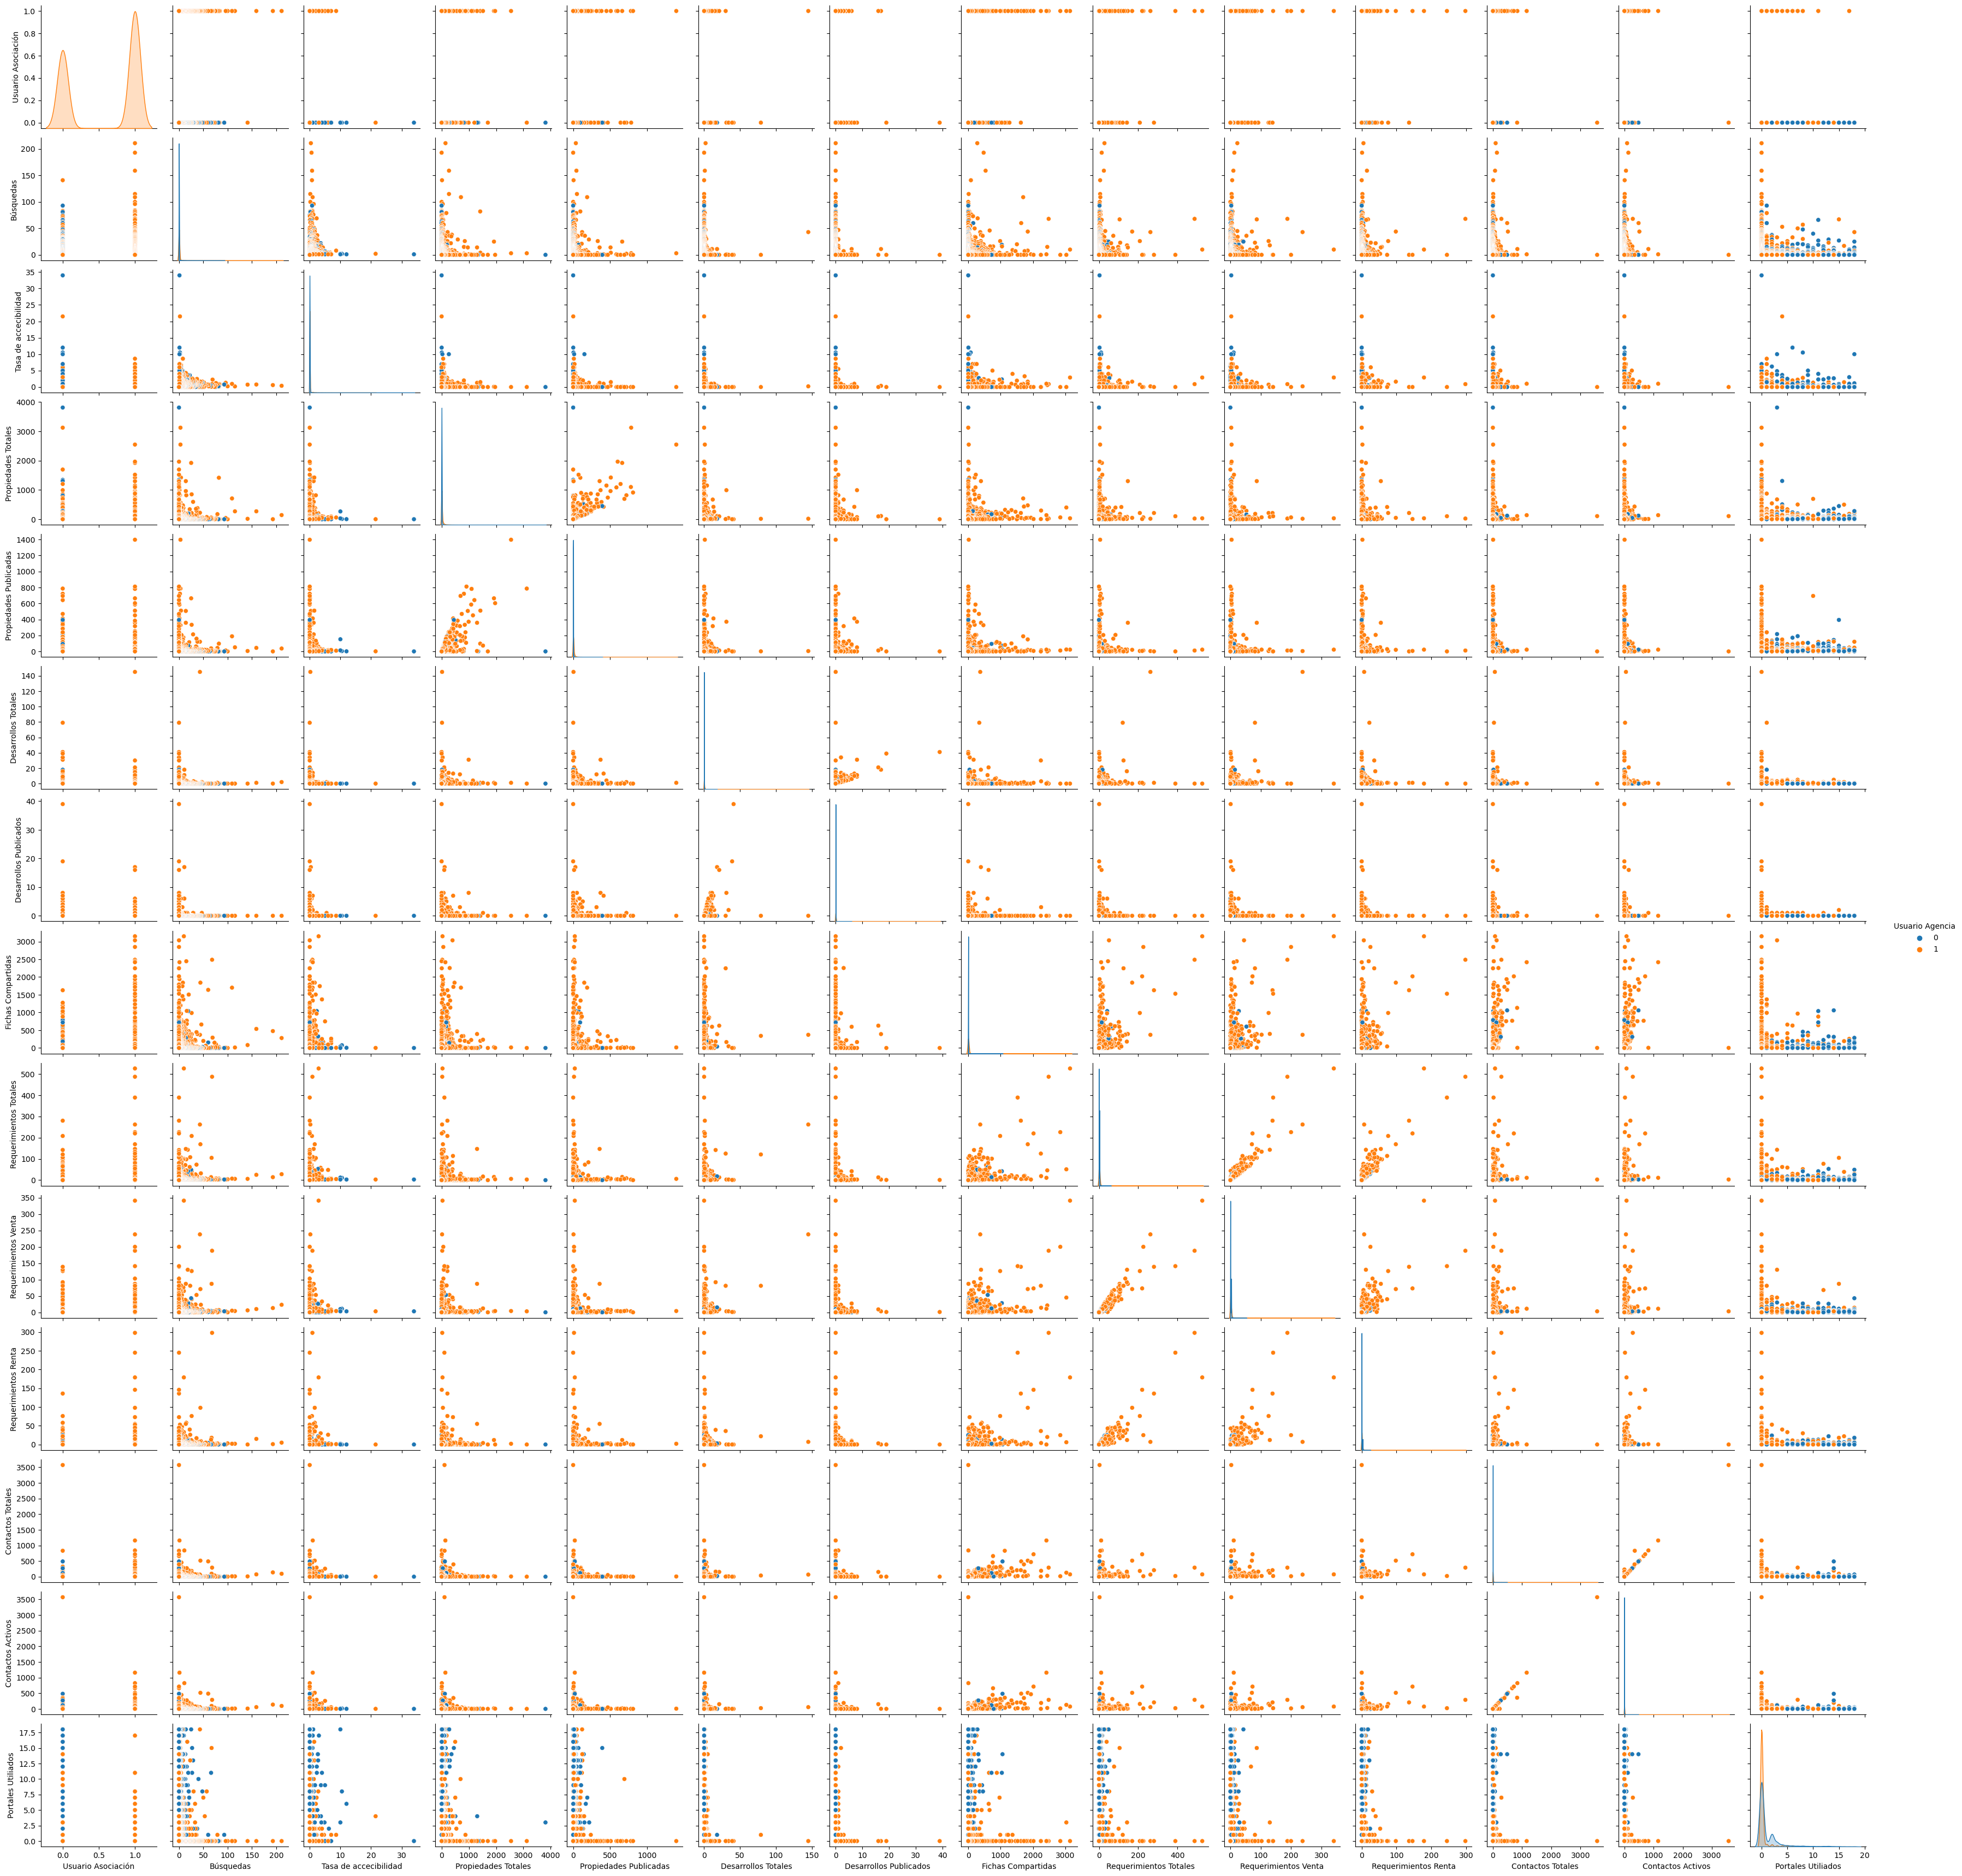

In [57]:
plt.show()

<AxesSubplot:xlabel='Portales Utiliados', ylabel='Propiedades Totales'>

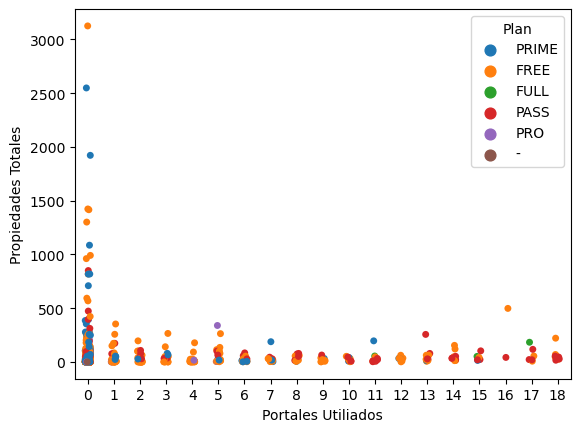

In [38]:
sns.stripplot(x=user_data_num['Portales Utiliados'], y=user_data_num['Propiedades Totales'], hue=user_data_num['Plan'])

In [37]:
user_data_num.columns

Index(['Usuario Agencia', 'Usuario Asociación', 'Búsquedas',
       'Tasa de accecibilidad', 'Propiedades Totales',
       'Propiedades Publicadas', 'Desarrollos Totales',
       'Desarrollos Publicados', 'Fichas Compartidas',
       'Requerimientos Totales', 'Requerimientos Venta',
       'Requerimientos Renta', 'Contactos Totales', 'Contactos Activos',
       'Portales Utiliados'],
      dtype='object')

In [78]:
user_data_num_complete = user_data_num.loc[user_data['Búsquedas']>0, ['Portales Utiliados', 
                                                                      'Contactos Activos', 
                                                                      'Requerimientos Renta', 
                                                                      'Requerimientos Venta', 
                                                                      'Fichas Compartidas', 
                                                                      'Desarrollos Totales', 
                                                                      'Propiedades Totales', 
                                                                      'Búsquedas', 
                                                                      'Tasa de accecibilidad']]

ss = StandardScaler()
user_data_ss = ss.fit_transform(user_data_num_complete)

In [79]:
pca = PCA(n_components=None)
components = pca.fit_transform(user_data_ss)

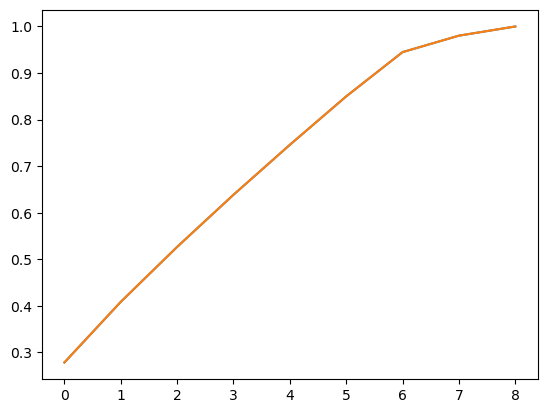

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

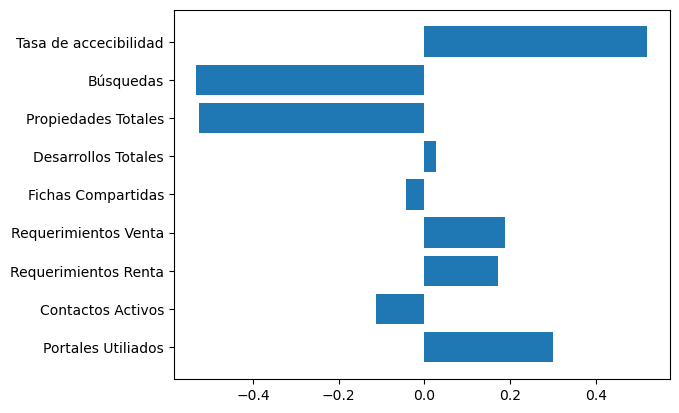

In [12]:
np.unique(user_data.loc[user_data['Búsquedas']>0, 'Plan'])

array(['-', 'FREE', 'FULL', 'PASS', 'PRIME', 'PRO'], dtype=object)

In [13]:
colors = {'PRIME':0, 'FREE':1, 'FULL':2, '-':3, 'PRO':4}
colored = user_data.loc[user_data['Búsquedas']>0, 'Plan'].map(colors)

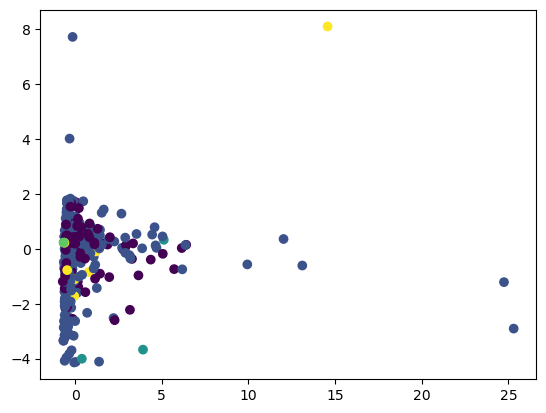

In [99]:
plt.scatter(components[:, 0], components[:, 3], c=colored)